<a href="https://colab.research.google.com/github/AlexandreMenezesSa/Python-Beginner/blob/master/algoritmos_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exemplo do algoritmo  não supervisionado k-means**

In [ ]:
#importa as bibliotecas necessárias
from pandas import DataFrame
import matplotlib.pyplot as plt


In [ ]:
#cria dados aleatórios
dados = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }

In [ ]:
#cria o dataframe
df = DataFrame(dados,columns=['x','y'])
df.head()

,x,y
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59


In [ ]:
#adiciona as bibliotecas para construir o algoritmo
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4)    # cria o objeto de para o algoritmo k-means para encontrar 2 clusters
kmeans.fit(df)  #aplica o algoritmo
centroides = kmeans.cluster_centers_   #encontra as coordenadas dos centroids
print(centroides)

[[55.1        46.1       ]
 [43.2        16.7       ]
 [30.83333333 74.66666667]
 [27.75       55.        ]]


Text(0, 0.5, 'Y')

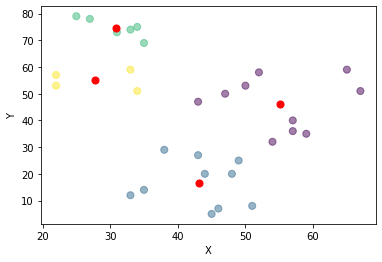

In [ ]:
#realiza o plot do gráfico da saída
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=50)
plt.xlabel("X")
plt.ylabel("Y")

**Exemplo do algoritmo Supervisionado  - KNN**

In [ ]:
#importando as bibliotecas 
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np

In [ ]:
#cria a rotina para utilizar o dataset Iris
iris = datasets.load_iris()


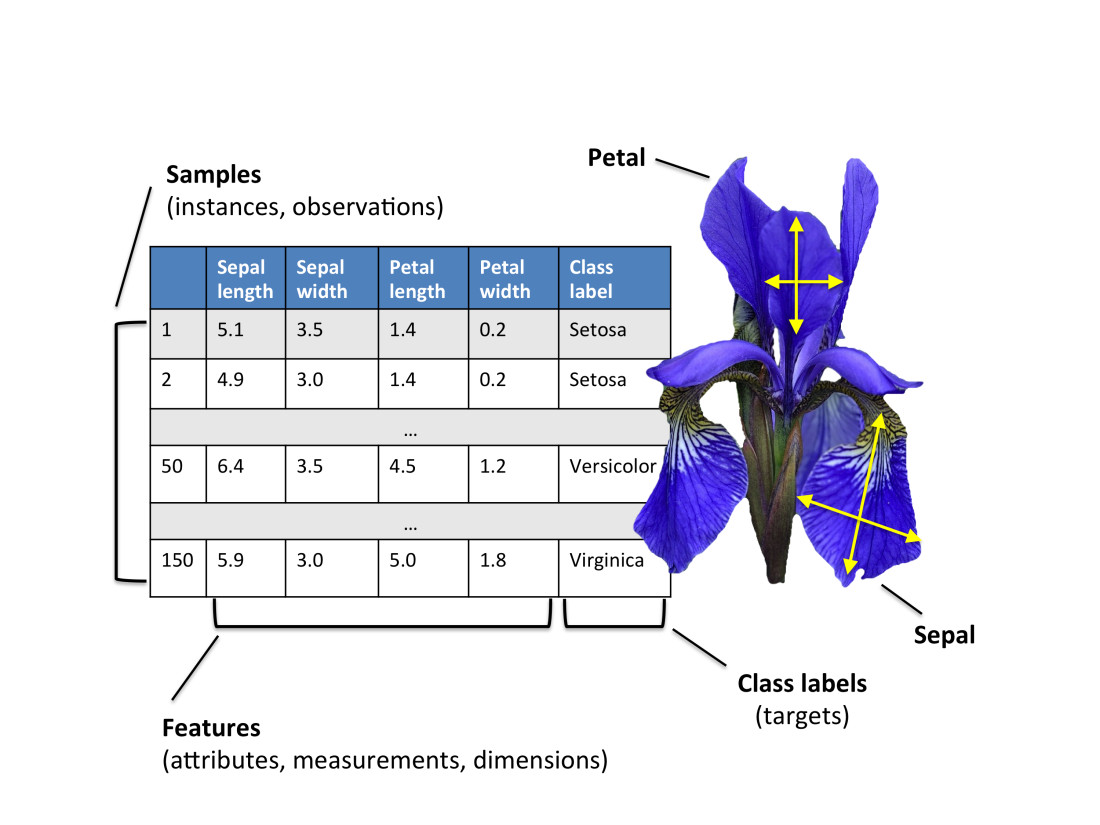

In [ ]:
#Converte o banco de dados iris para o dataframe
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [ ]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df_iris.shape

(150, 5)

In [ ]:
#transforma os dados em array
X = df_iris.iloc[:, :-1].values  #dados de entrada
y = df_iris.iloc[:, 4].values  # saídas ou target

In [ ]:
#realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)# divide 20% para teste

In [ ]:
# realiza o processo de normalização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  #objeto que normaliza os dados
scaler.fit(X_train)  #realiza a normalização dos dados

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#treina o modelo 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
classifier.fit(X_train, y_train) # aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#realiza a previsão
y_pred = classifier.predict(X_test)

In [ ]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[11  0  0]
 [ 0 11  1]
 [ 0  1  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       0.92      0.92      0.92        12
         2.0       0.86      0.86      0.86         7

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



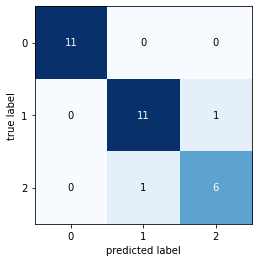

In [ ]:
#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

**Exemplo do algoritmo Supervisionado  - Árvore de Decisão**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
from sklearn import metrics #importa as métricas para avaliação


In [ ]:
# Cria o objeto de classificação através do 
clf = DecisionTreeClassifier()

# Realiza o treinamento do classificador
clf = clf.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)

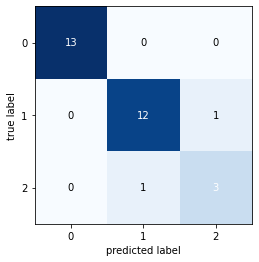

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [ ]:
#visualização da árvore de decisão
#impor das bibliotecas necessárias para realizar a visualização da árvore de decisão
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


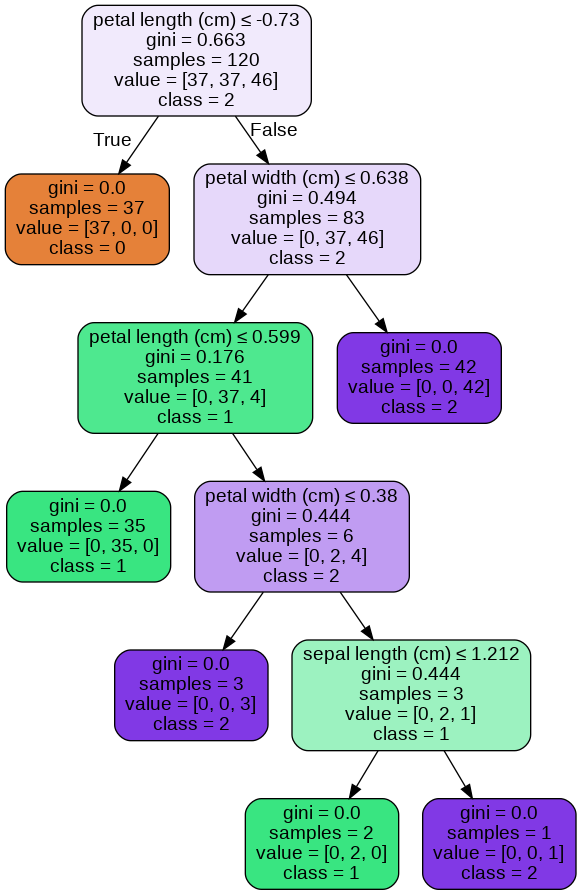

In [ ]:
#Constrói a árvore de decisão para o DB Iris
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = iris.feature_names,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())

**Exemplo do algoritmo Supervisionado  - Suppor Vector Machine (SVM)**

In [ ]:
#biblioteca necessária para a construção do SVM
from sklearn.svm import SVC

In [ ]:
#cria o objeto SVM
clf = SVC()    

In [ ]:
#realiza a classificação via SVM
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)

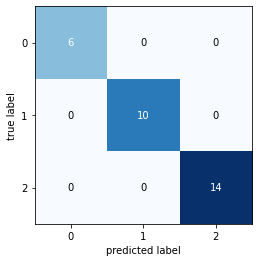

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

**Exemplo de Redes Neurais**

In [ ]:
#definição da biblioteca
from sklearn.neural_network import MLPClassifier

In [ ]:
#define a configuração da rede
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 5), random_state=1) #rede com escondidas com 5 neurônios cada 

In [ ]:
#realiza o fit do modelo
clf.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#realiza a previsão
y_pred=clf.predict(X_test)

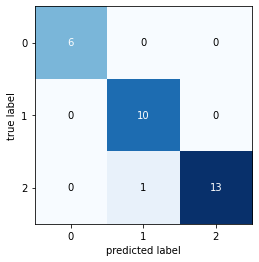

In [ ]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

**Rede neural em deep learning com o TensorFlow**

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, Activation  #importando as camadas a serem utilizadas
from tensorflow.keras.models import Model  #importando o modelo a ser empregado
import seaborn as sns #plotar gráficos

In [ ]:
dataset = sns.load_dataset('iris') #importando o dataset
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#dividindo entre entrada e saida
X = dataset.drop(['species'], axis=1)
y = pd.get_dummies(dataset.species, prefix='output') #transforma cada uma das classes em vetores 

In [ ]:
X.head() #entradas

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head() #saidas

,output_setosa,output_versicolor,output_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
#divide os dados entre treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=39)

In [ ]:
from sklearn.preprocessing import StandardScaler #aplica a normalização dos dados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
entrada = Input(shape=(X_train.shape[1],))
camada_1 = Dense(100, activation='relu')(entrada)
camada_2 = Dense(50, activation='relu')(camada_1)
camada_3 = Dense(25, activation='relu')(camada_2)
saida = Dense(y_train.shape[1], activation='softmax')(camada_3)

In [ ]:
model = Model(inputs = entrada, outputs = saida) #define o modelo

In [ ]:
model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               500       
_________________________________________________________________
dense_17 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_18 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 78        
Total params: 6,903
Trainable params: 6,903
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
#realizando o treinamendo da nossa rede 
history = model.fit(X_train, y_train, batch_size=4, epochs=20, verbose=1, validation_split=0.20)

Epoch 1/20
24/24 [==============================] - 0s 7ms/step - loss: 0.8122 - acc: 0.7917 - val_loss: 0.7525 - val_acc: 0.7917
Epoch 2/20
24/24 [==============================] - 0s 3ms/step - loss: 0.5161 - acc: 0.8229 - val_loss: 0.5750 - val_acc: 0.7917
Epoch 3/20
24/24 [==============================] - 0s 3ms/step - loss: 0.3770 - acc: 0.8438 - val_loss: 0.4661 - val_acc: 0.7917
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 0.2946 - acc: 0.8646 - val_loss: 0.3864 - val_acc: 0.7917
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.2361 - acc: 0.8958 - val_loss: 0.3955 - val_acc: 0.7500
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1942 - acc: 0.9375 - val_loss: 0.3260 - val_acc: 0.8333
Epoch 7/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1603 - acc: 0.9583 - val_loss: 0.2832 - val_acc: 0.8750
Epoch 8/20
24/24 [==============================] - 0s 2ms/step - loss: 0.1336 - acc: 0.96

In [ ]:
acuracia=model.evaluate(X_test, y_test, verbose=1) #acurácia do modelo

print("Acurácia do modelo:", acuracia[1])

1/1 [==============================] - 0s 1ms/step - loss: 0.1902 - acc: 0.9333
Acurácia do modelo: 0.9333333373069763
